In [2]:
import numpy as np
import pandas as pd
# import os
# os.chdir()

#Read CSV
train=pd.read_csv("/Users/PraveenGupta/Downloads/Hackathon/BigMart Sales/Train_UWu5bXk.csv")
test=pd.read_csv("/Users/PraveenGupta/Downloads/Hackathon/BigMart Sales/Test_u94Q5KV.csv")

In [3]:
#creates a new column 'source' with values as 'train' for all train data and 'test' for all test data
train['source']='train'
test['source']='test'

data=pd.concat([train,test],ignore_index=True)
print train.shape,test.shape,data.shape

#data.apply(lambda x:sum(x.isnull()))

data.isnull().sum()


(8523, 13) (5681, 12) (14204, 13)


Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [3]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [4]:
data.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

In [5]:
#Filter categorical variables and exclude Item_Identifier etc
categorical_columns=[x for x in data.dtypes.index if data.dtypes[x]== 'object']
categorical_columns=[x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]

for col in categorical_columns:
    print "\nFrequency of categories for variable %s"%col
    print data[col].value_counts()


Frequency of categories for variable Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of categories for variable Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of categories for variable Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Frequency of categories for variable Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int6

In [6]:
item_avg_wt=data.pivot_table(values='Item_Weight',index='Item_Identifier')
print item_avg_wt

miss_bool=data['Item_Weight'].isnull()
# print "hi", sum(miss_bool)
print miss_bool

data.loc[miss_bool,'Item_Weight']=data.loc[miss_bool,'Item_Identifier'].apply(lambda x : item_avg_wt[x])
print sum(data['Item_Weight'].isnull())



Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
DRB24     8.785
DRB25    12.300
DRB48    16.750
DRC01     5.920
DRC12    17.850
DRC13     8.260
DRC24    17.850
DRC25     5.730
DRC27    13.800
DRC36    13.000
DRC49     8.670
DRD01    12.100
DRD12     6.960
DRD13    15.000
DRD15    10.600
DRD24    13.850
DRD25     6.135
DRD27    18.750
DRD37     9.800
DRD49     9.895
DRD60    15.700
DRE01    10.100
DRE03    19.600
DRE12     4.590
DRE13     6.280
          ...  
NCX05    15.200
NCX06    17.600
NCX17    21.250
NCX18    14.150
NCX29    10.000
NCX30    16.700
NCX41    19.000
NCX42     6.360
NCX53    20.100
NCX54     9.195
NCY05    13.500
NCY06    15.250
NCY17    18.200
NCY18     7.285
NCY29    13.650
NCY30    20.250
NCY41    16.750
NCY42     6.380
NCY53    20.000
NCY54     8.430
NCZ05     8.485
NCZ06    19.600
NCZ17    12.150
NCZ18     7.825
NCZ29    15.000
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: It

In [7]:
### to impute Outlet_Size with mode of Outlet_Size
from scipy.stats import mode

outlet_size_mode=data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]))
print "mode for each outlet size type"
print outlet_size_mode

miss_bool=data['Outlet_Size'].isnull()
print "Original missing %d"%sum(miss_bool)

data.loc[miss_bool,'Outlet_Size']=data.loc[miss_bool,'Outlet_Type'].apply(lambda x:outlet_size_mode[x])
print "after imputing missing %d"%sum(data['Outlet_Size'].isnull())

mode for each outlet size type
Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object
Original missing 4016
after imputing missing 0


C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\scipy\stats\stats.py:257: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)
C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\numpy\lib\arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


In [8]:
visibility_avg=data.pivot_table(values='Item_Visibility',index='Item_Identifier')
miss_bool=(data['Item_Visibility']==0)

print 'Number of zeros initially %d'%sum(miss_bool)
data.loc[miss_bool,'Item_Visibility']=data.loc[miss_bool,"Item_Identifier"].apply(lambda x:visibility_avg[x])
print 'Number of zeros after imputing %d'%sum(data['Item_Visibility']==0)

Number of zeros initially 879
Number of zeros after imputing 0


In [9]:
# determine another feature
data['Item_Visibility_MeanRatio']=data.apply(lambda x: x['Item_Visibility']/visibility_avg[x['Item_Identifier']],axis=1)
print data['Item_Visibility_MeanRatio'].describe()
print visibility_avg[[0,10]]#[data[1]['Item_Identifier']]

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64
Item_Identifier
DRA12    0.034938
DRC13    0.028408
Name: Item_Visibility, dtype: float64


In [10]:
#capturing initial two characters of string and separating the data 
data['Item_Type_Combined']=data['Item_Identifier'].apply(lambda x:x[0:2])
#Renaming them to more intuitive categories.
data['Item_Type_Combined']=data['Item_Type_Combined'].map({'FD':'Food',
                                                            'NC':'Non-Consumable',
                                                            'DR':'Drinks'})

data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [11]:
data['Outlet_Years']=2013-data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [12]:
print 'Original Categories :'
print data['Item_Fat_Content'].value_counts()

print '\n Modified Categories :'
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'LF': 'Low Fat',
                                                          'reg':'Regular',
                                                          'low fat':'Low Fat'})
data['Item_Fat_Content'].value_counts()

Original Categories :
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

 Modified Categories :


Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [13]:
#Mark non-consumables as separate category in low_fat
data.loc[data['Item_Type_Combined']=='Non-Consumable','Item_Fat_Content']='Non-Edible'
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [17]:
#Outlet Identifier is the store number /name so changed it also to numeric
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Outlet']=le.fit_transform(data['Outlet_Identifier'])
var_mod=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
for i in var_mod:
    data[i]=le.fit_transform(data[i])

data=pd.get_dummies(data,columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet'])

KeyError: 'Item_Fat_Content'

In [16]:
data.dtypes#['Item_Fat_Content']

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0           float64
Item_Fat_Content_1           float64
Item_Fat_Content_2           float64
Outlet_Location_Type_0       float64
Outlet_Location_Type_1       float64
Outlet_Location_Type_2       float64
Outlet_Size_0                float64
Outlet_Size_1                float64
Outlet_Size_2                float64
Item_Type_Combined_0         float64
Item_Type_Combined_1         float64
Item_Type_Combined_2         float64
Outlet_Type_0                float64
Outlet_Type_1                float64
Outlet_Type_2                float64
Outlet_Type_3                float64
O

In [19]:
#drop the columns whose data types are converted.  Item type which is of
#16 categories has been reduced to 3 categories and instead of the establishment year
#we consider age of the stores for the analysis.
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide the data set back to train and test 
train=data.loc[data['source']=='train']
test=data.loc[data['source']=='test']
train.head
#Drop unnecessary columns
test.drop(['source','Item_Outlet_Sales'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions
train.to_csv("/Users/PraveenGupta/Downloads/Hackathon/BigMart Sales/train_modified.csv",index=False)
test.to_csv("/Users/PraveenGupta/Downloads/Hackathon/BigMart Sales/test_modified.csv",index=False)

C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
#Creating a baseline model
mean_sales=train['Item_Outlet_Sales'].mean()

#Define a dataframe with IDs for submission
base1=test[['Item_Identifier','Outlet_Identifier']]
base1['Item_Outlet_Sales']=mean_sales

#Export submission file
base1.to_csv("/Users/PraveenGupta/Downloads/Hackathon/BigMart Sales/alg0.csv",index=False)

C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [19]:
base1['Item_Outlet_Sales']=base1['Outlet_Identifier'].apply(lambda x: train.loc[train['Outlet_Identifier']==x]
                                                            ['Item_Outlet_Sales'].mean())

# base1.to_csv("/Users/PraveenGupta/Downloads/Hackathon/BigMart Sales/alg0.csv",index=False)
# base1['Outlet_Identifier'].apply(lambda x: x=='OUT049')
# abc=train.loc[train['Outlet_Identifier']=='OUT049']['Item_Outlet_Sales'].mean()
# abc

C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [20]:
#function to create submission file
#define target and ID Columns for submission
target = 'Item_Outlet_Sales'
IDCol = ['Item_Identifier','Outlet_Identifier']

from sklearn import cross_validation, metrics

def modelfit(alg,dtrain,dtest,predictors,target,IDCol,filename):
    #fit the algorithm on the data
    alg.fit(dtrain[predictors],dtrain[target])
    
    #predict training data set
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    #performs cross validation
    cv_score = cross_validation.cross_val_score(alg,dtrain[predictors],dtrain[target],cv=20,scoring='mean_squared_error')
    cv_score=np.sqrt(np.abs(cv_score))
    
    #Print model report
    print "\nModel Report :"
    print "RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values,dtrain_predictions))
    print "CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g"%(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
    
    #Predict on testing data
    dtest[target]=alg.predict(dtest[predictors])
    
    #Export submission file
    IDCol.append(target)
    submission = pd.DataFrame({x : dtest[x] for x in IDCol})
    submission.to_csv("/Users/PraveenGupta/Downloads/Hackathon/BigMart Sales/"+filename,index=False)

In [27]:
train

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Item_Visibility_MeanRatio,Outlet_Years,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,OUT049,0.931078,14,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,0.933420,4,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,0.960069,14,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.200,1998,OUT010,1.000000,15,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,Household,0.009780,8.930,1987,OUT013,1.000000,26,...,0,1,0,0,0,0,0,0,0,0
5,FDP36,51.4008,556.6088,Baking Goods,0.057059,10.395,2009,OUT018,1.000000,4,...,0,0,0,1,0,0,0,0,0,0
6,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,1.497197,26,...,0,1,0,0,0,0,0,0,0,0
7,FDP10,107.7622,4022.7636,Snack Foods,0.127470,19.000,1985,OUT027,0.870493,28,...,0,0,0,0,0,1,0,0,0,0
8,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,0.924160,11,...,0,0,0,0,0,0,0,1,0,0
9,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,0.963983,6,...,0,0,1,0,0,0,0,0,0,0


In [26]:
# Linear Regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import AdaBoostRegressor
%matplotlib inline

predictors = [x for x in train.columns if x not in [target]+IDCol]
#print predictors
alg1= LinearRegression(normalize=True)
ada1=AdaBoostRegressor(base_estimator=alg1,learning_rate=0.9)
modelfit(ada1,train,test,predictors,target,IDCol,'alg1.csv')
# coef1=pd.Series(alg1.coef_,predictors).sort_values()
# coef1.plot(kind='bar',title='Model Coefficients')



Model Report :
RMSE : 1150
CV Score : Mean - 1158 | Std - 40.92 | Min - 1082 | Max - 1226


C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
#Ridge Regression
predictors = [x for x in train.columns if x not in [target]+IDCol]
alg2=Ridge(alpha=0.05,normalize=True)
modelfit(alg2,train,test,predictors,target,IDCol,'Ridge_alg2.csv')
coef2 = pd.Series(alg2.coef_,predictors).sort_values()
coef2.plot(kind='bar',title = 'Model Coefficients')

In [34]:
#DecisionTree Model
from sklearn.tree import DecisionTreeRegressor
predictors=[x for x in train.columns if x not in [target]+IDCol]
alg3=DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)
ada1=AdaBoostRegressor(base_estimator=alg3)#,learning_rate=0.9)
modelfit(ada1,train,test,predictors,target,IDCol,'DTree_alg3.csv')
coef3=pd.Series(alg3.feature_importances_,predictors).sort_values(ascending=False)
coef3.plot(kind='bar',title='Feature Importances')

#we can further tune by processing only with the most effective columns


Model Report :
RMSE : 1104
CV Score : Mean - 1247 | Std - 40.96 | Min - 1169 | Max - 1323


C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


NotFittedError: Estimator not fitted, call `fit` before `feature_importances_`.

In [31]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
predictors=[x for x in train.columns if x not in [target]+IDCol]
alg5=RandomForestRegressor(n_estimators=200,max_depth=3,min_samples_leaf=300,n_jobs=4)
ada1=AdaBoostRegressor(base_estimator=alg5)#,learning_rate=0.9)
modelfit(ada1,train,test,predictors,target,IDCol,'alg5_RandomForest.csv')
coef5=pd.Series(alg5.feature_importances_,predictors).sort_values(ascending=False)
coef5.plot(kind='bar',title='Feature Importances')


KeyboardInterrupt: 


Model Report :
RMSE : 1068
CV Score : Mean - 1083 | Std - 44.11 | Min - 1019 | Max - 1162


C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


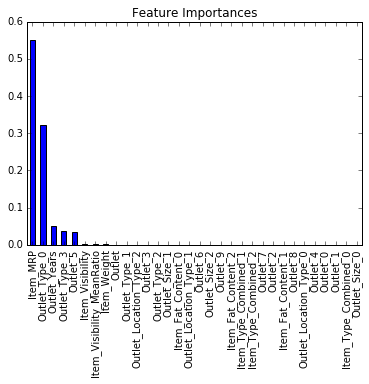

In [22]:
#RandomForest Tuning
from sklearn.ensemble import RandomForestRegressor
predictors=[x for x in train.columns if x not in [target]+IDCol]
alg6=RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=100,n_jobs=4)
modelfit(alg6,train,test,predictors,target,IDCol,'alg6_RandomForest.csv')
coef6=pd.Series(alg6.feature_importances_,predictors).sort_values(ascending=False)
coef6.plot(kind='bar',title='Feature Importances')


In [65]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV

predictors=[x for x in train.columns if x not in [target]+IDCol]
alg1= LinearRegression(normalize=True)
alg7=GradientBoostingRegressor(learning_rate=0.1,max_depth=5,random_state=10,
                              n_estimators=70,min_samples_split=1000,min_samples_leaf=50,
                               max_leaf_nodes=7,max_features='sqrt')#,init=alg1)#loss='huber'
alg7.fit(train[predictors],train[target])
# param_test1 = {'n_estimators':range(20,81,10)}
# gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
# param_grid = param_test1, scoring='mean_squared_error',n_jobs=4,iid=False, cv=5)
# gsearch1.fit(train[predictors],train[target])

modelfit(alg7,train,test,predictors,target,IDCol,'alg9_GradBoost.csv')


Model Report :
RMSE : 1080
CV Score : Mean - 1098 | Std - 48.97 | Min - 1018 | Max - 1199


C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [45]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV

param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=70, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: -1181181.36232, std: 24467.58641, params: {'min_samples_split': 200, 'max_depth': 5},
  mean: -1176276.14760, std: 20082.18922, params: {'min_samples_split': 400, 'max_depth': 5},
  mean: -1179381.41692, std: 27578.38479, params: {'min_samples_split': 600, 'max_depth': 5},
  mean: -1191334.16105, std: 27417.74467, params: {'min_samples_split': 800, 'max_depth': 5},
  mean: -1190517.48640, std: 28746.66335, params: {'min_samples_split': 1000, 'max_depth': 5},
  mean: -1202034.61140, std: 21333.12040, params: {'min_samples_split': 200, 'max_depth': 7},
  mean: -1183830.33635, std: 25669.63781, params: {'min_samples_split': 400, 'max_depth': 7},
  mean: -1186761.39911, std: 30309.24289, params: {'min_samples_split': 600, 'max_depth': 7},
  mean: -1196220.92273, std: 24882.64937, params: {'min_samples_split': 800, 'max_depth': 7},
  mean: -1197762.05776, std: 31296.97935, params: {'min_samples_split': 1000, 'max_depth': 7},
  mean: -1211538.89655, std: 19396.53440, params: {'min_sa

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV

param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=70,max_depth=5,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: -1195056.33320, std: 27293.89149, params: {'min_samples_split': 1000, 'min_samples_leaf': 30},
  mean: -1197966.47913, std: 33153.79310, params: {'min_samples_split': 1200, 'min_samples_leaf': 30},
  mean: -1205686.73390, std: 30851.05174, params: {'min_samples_split': 1400, 'min_samples_leaf': 30},
  mean: -1208588.21408, std: 35143.34532, params: {'min_samples_split': 1600, 'min_samples_leaf': 30},
  mean: -1222067.05267, std: 36657.44737, params: {'min_samples_split': 1800, 'min_samples_leaf': 30},
  mean: -1228930.03417, std: 38146.51587, params: {'min_samples_split': 2000, 'min_samples_leaf': 30},
  mean: -1192530.41655, std: 25371.91113, params: {'min_samples_split': 1000, 'min_samples_leaf': 40},
  mean: -1198694.85466, std: 33436.41270, params: {'min_samples_split': 1200, 'min_samples_leaf': 40},
  mean: -1203494.30821, std: 31993.45168, params: {'min_samples_split': 1400, 'min_samples_leaf': 40},
  mean: -1204513.95681, std: 36153.76700, params: {'min_samples_split': 1

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV

param_test4 = {'max_features':range(2,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=70,max_depth=5, min_samples_split=1000, min_samples_leaf=50, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: -1347249.29530, std: 56691.02150, params: {'max_features': 2},
  mean: -1244618.83336, std: 47188.95951, params: {'max_features': 4},
  mean: -1198607.92952, std: 32405.20533, params: {'max_features': 6},
  mean: -1194222.88232, std: 27122.89785, params: {'max_features': 8},
  mean: -1180606.02704, std: 23814.80252, params: {'max_features': 10},
  mean: -1180352.72479, std: 21618.96526, params: {'max_features': 12},
  mean: -1178383.82662, std: 24846.10334, params: {'max_features': 14},
  mean: -1174762.75184, std: 20729.60409, params: {'max_features': 16},
  mean: -1173727.40305, std: 21634.83673, params: {'max_features': 18}],
 {'max_features': 18},
 -1173727.4030527088)

In [63]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV

param_test4 = {'min_weight_fraction_leaf':range(2,10,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=70,max_depth=5,
                                                              min_samples_split=1000, min_samples_leaf=50, 
                                                              max_features = 18,subsample=0.8, random_state=10,
                                                             max_leaf_nodes=7),
param_grid = param_test4, scoring='mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\runpy.py in _run_module_as_main(mod_name='ipykernel.__main__', alter_argv=1)
    157     pkg_name = mod_name.rpartition('.')[0]
    158     main_globals = sys.modules["__main__"].__dict__
    159     if alter_argv:
    160         sys.argv[0] = fname
    161     return _run_code(code, main_globals, None,
--> 162                      "__main__", fname, loader, pkg_name)
        fname = r'C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py'
        loader = <pkgutil.ImpLoader instance>
        pkg_name = 'ipykernel'
    163 
    164 def run_module(mod_name, init_globals=None,
    165                run_name=None, alter_sys=False):
    166     """Execute a module's code without importing it

...........................................................................
C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\runpy.py in _run_code(code=<code object <module> at 000000000283AF30, file ...lib\site-packages\ipykernel\__main__.py", line 1>, run_globals={'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': r'C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'ipykernel', 'app': <module 'ipykernel.kernelapp' from 'C:\Users\Pra...\py27\lib\site-packages\ipykernel\kernelapp.pyc'>}, init_globals=None, mod_name='__main__', mod_fname=r'C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py', mod_loader=<pkgutil.ImpLoader instance>, pkg_name='ipykernel')
     67         run_globals.update(init_globals)
     68     run_globals.update(__name__ = mod_name,
     69                        __file__ = mod_fname,
     70                        __loader__ = mod_loader,
     71                        __package__ = pkg_name)
---> 72     exec code in run_globals
        code = <code object <module> at 000000000283AF30, file ...lib\site-packages\ipykernel\__main__.py", line 1>
        run_globals = {'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': r'C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'ipykernel', 'app': <module 'ipykernel.kernelapp' from 'C:\Users\Pra...\py27\lib\site-packages\ipykernel\kernelapp.pyc'>}
     73     return run_globals
     74 
     75 def _run_module_code(code, init_globals=None,
     76                     mod_name=None, mod_fname=None,

...........................................................................
C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py in <module>()
      1 
      2 
----> 3 
      4 if __name__ == '__main__':
      5     from ipykernel import kernelapp as app
      6     app.launch_new_instance()
      7 
      8 
      9 
     10 

...........................................................................
C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    584         
    585         If a global instance already exists, this reinitializes and starts it
    586         """
    587         app = cls.instance(**kwargs)
    588         app.initialize(argv)
--> 589         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    590 
    591 #-----------------------------------------------------------------------------
    592 # utility functions, for convenience
    593 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    400         
    401         if self.poller is not None:
    402             self.poller.start()
    403         self.kernel.start()
    404         try:
--> 405             ioloop.IOLoop.instance().start()
    406         except KeyboardInterrupt:
    407             pass
    408 
    409 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\zmq\eventloop\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    157             PollIOLoop.configure(ZMQIOLoop)
    158         return PollIOLoop.current(*args, **kwargs)
    159     
    160     def start(self):
    161         try:
--> 162             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    163         except ZMQError as e:
    164             if e.errno == ETERM:
    165                 # quietly return on ETERM
    166                 pass

...........................................................................
C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\tornado\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    878                 self._events.update(event_pairs)
    879                 while self._events:
    880                     fd, events = self._events.popitem()
    881                     try:
    882                         fd_obj, handler_func = self._handlers[fd]
--> 883                         handler_func(fd_obj, events)
        handler_func = <function null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    884                     except (OSError, IOError) as e:
    885                         if errno_from_exception(e) == errno.EPIPE:
    886                             # Happens when the client closes the connection
    887                             pass

...........................................................................
C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    255         if self.control_stream:
    256             self.control_stream.on_recv(self.dispatch_control, copy=False)
    257 
    258         def make_dispatcher(stream):
    259             def dispatcher(msg):
--> 260                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    261             return dispatcher
    262 
    263         for s in self.shell_streams:
    264             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {u'allow_stdin': True, u'code': u"from sklearn.ensemble import GradientBoostingR..._, gsearch4.best_params_, gsearch4.best_score_\n", u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {'date': '2016-03-09T02:49:39.722000', u'msg_id': u'CDFCD53C7F0E4583AF18934F0BA1ACF5', u'msg_type': u'execute_request', u'session': u'EECD6C0E655B4DA9A01F933D7F11CE75', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'CDFCD53C7F0E4583AF18934F0BA1ACF5', 'msg_type': u'execute_request', 'parent_header': {}})
    207             self.log.error("UNKNOWN MESSAGE TYPE: %r", msg_type)
    208         else:
    209             self.log.debug("%s: %s", msg_type, msg)
    210             self.pre_handler_hook()
    211             try:
--> 212                 handler(stream, idents, msg)
        handler = <bound method IPythonKernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = ['EECD6C0E655B4DA9A01F933D7F11CE75']
        msg = {'buffers': [], 'content': {u'allow_stdin': True, u'code': u"from sklearn.ensemble import GradientBoostingR..._, gsearch4.best_params_, gsearch4.best_score_\n", u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {'date': '2016-03-09T02:49:39.722000', u'msg_id': u'CDFCD53C7F0E4583AF18934F0BA1ACF5', u'msg_type': u'execute_request', u'session': u'EECD6C0E655B4DA9A01F933D7F11CE75', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'CDFCD53C7F0E4583AF18934F0BA1ACF5', 'msg_type': u'execute_request', 'parent_header': {}}
    213             except Exception:
    214                 self.log.error("Exception in message handler:", exc_info=True)
    215             finally:
    216                 self.post_handler_hook()

...........................................................................
C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=['EECD6C0E655B4DA9A01F933D7F11CE75'], parent={'buffers': [], 'content': {u'allow_stdin': True, u'code': u"from sklearn.ensemble import GradientBoostingR..._, gsearch4.best_params_, gsearch4.best_score_\n", u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {'date': '2016-03-09T02:49:39.722000', u'msg_id': u'CDFCD53C7F0E4583AF18934F0BA1ACF5', u'msg_type': u'execute_request', u'session': u'EECD6C0E655B4DA9A01F933D7F11CE75', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'CDFCD53C7F0E4583AF18934F0BA1ACF5', 'msg_type': u'execute_request', 'parent_header': {}})
    365         if not silent:
    366             self.execution_count += 1
    367             self._publish_execute_input(code, parent, self.execution_count)
    368 
    369         reply_content = self.do_execute(code, silent, store_history,
--> 370                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    371 
    372         # Flush output before sending the reply.
    373         sys.stdout.flush()
    374         sys.stderr.flush()

...........................................................................
C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code=u"from sklearn.ensemble import GradientBoostingR..._, gsearch4.best_params_, gsearch4.best_score_\n", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    170 
    171         reply_content = {}
    172         # FIXME: the shell calls the exception handler itself.
    173         shell._reply_content = None
    174         try:
--> 175             shell.run_cell(code, store_history=store_history, silent=silent)
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = u"from sklearn.ensemble import GradientBoostingR..._, gsearch4.best_params_, gsearch4.best_score_\n"
        store_history = True
        silent = False
    176         except:
    177             status = u'error'
    178             # FIXME: this code right now isn't being used yet by default,
    179             # because the run_cell() call above directly fires off exception

...........................................................................
C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell=u"from sklearn.ensemble import GradientBoostingR..._, gsearch4.best_params_, gsearch4.best_score_\n", store_history=True, silent=False, shell_futures=True)
   2897                 self.displayhook.exec_result = result
   2898 
   2899                 # Execute the user code
   2900                 interactivity = "none" if silent else self.ast_node_interactivity
   2901                 self.run_ast_nodes(code_ast.body, cell_name,
-> 2902                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler instance>
   2903 
   2904                 # Reset this so later displayed values do not modify the
   2905                 # ExecutionResult
   2906                 self.displayhook.exec_result = None

...........................................................................
C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>], cell_name='<ipython-input-63-fdef70e2b149>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler instance>, result=<IPython.core.interactiveshell.ExecutionResult object>)
   3001 
   3002         try:
   3003             for i, node in enumerate(to_run_exec):
   3004                 mod = ast.Module([node])
   3005                 code = compiler(mod, cell_name, "exec")
-> 3006                 if self.run_code(code, result):
        self.run_code = <bound method ZMQInteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0000000003E16C30, file "<ipython-input-63-fdef70e2b149>", line 10>
        result = <IPython.core.interactiveshell.ExecutionResult object>
   3007                     return True
   3008 
   3009             for i, node in enumerate(to_run_interactive):
   3010                 mod = ast.Interactive([node])

...........................................................................
C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0000000003E16C30, file "<ipython-input-63-fdef70e2b149>", line 10>, result=<IPython.core.interactiveshell.ExecutionResult object>)
   3061         outflag = 1  # happens in more places, so it's easier as default
   3062         try:
   3063             try:
   3064                 self.hooks.pre_run_code_hook()
   3065                 #rprint('Running code', repr(code_obj)) # dbg
-> 3066                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0000000003E16C30, file "<ipython-input-63-fdef70e2b149>", line 10>
        self.user_global_ns = {'AdaBoostRegressor': <class 'sklearn.ensemble.weight_boosting.AdaBoostRegressor'>, 'DecisionTreeRegressor': <class 'sklearn.tree.tree.DecisionTreeRegressor'>, 'GradientBoostingRegressor': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>, 'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'IDCol': ['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', ...], 'In': ['', u'import numpy as np\nimport pandas as pd\n\n#Re...loads/Hackathon/BigMart Sales/Test_u94Q5KV.csv")', u"#creates a new column 'source' with values as ...ta.shape\n\ndata.apply(lambda x:sum(x.isnull()))", u'data.describe()', u'data.apply(lambda x: len(x.unique()))', u'#Filter categorical variables and exclude Item...able %s"%col\n    print data[col].value_counts()', u'item_avg_wt=data.pivot_table(values=\'Item_Wei...t[x])\nprint sum(data[\'Item_Weight\'].isnull())', u'### to impute Outlet_Size with mode of Outlet_... missing %d"%sum(data[\'Outlet_Size\'].isnull())', u'visibility_avg=data.pivot_table(values=\'Item_... imputing %d\'%sum(data[\'Item_Visibility\']==0)', u"# determine another feature\ndata['Item_Visibi...ibility_avg[[0,10]]#[data[1]['Item_Identifier']]", u"#capturing initial two characters of string an...'})\n\ndata['Item_Type_Combined'].value_counts()", u"data['Outlet_Years']=2013-data['Outlet_Establishment_Year']\ndata['Outlet_Years'].describe()", u"print 'Original Categories :'\nprint data['Ite... Fat'})\ndata['Item_Fat_Content'].value_counts()", u"#Mark non-consumables as separate category in ...Edible'\ndata['Item_Fat_Content'].value_counts()", u"from sklearn.preprocessing import LabelEncoder...e','Item_Type_Combined','Outlet_Type','Outlet'])", u'data', u"data['Outlet']", u"from sklearn.preprocessing import LabelEncoder...e','Item_Type_Combined','Outlet_Type','Outlet'])", u"data['Outlet']", u'#drop the columns whose data types are convert...on/BigMart Sales/test_modified.csv",index=False)', ...], 'LabelEncoder': <class 'sklearn.preprocessing.label.LabelEncoder'>, 'Lasso': <class 'sklearn.linear_model.coordinate_descent.Lasso'>, 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'Out': {2: Item_Fat_Content                0
Item_Identifie... 0
source                          0
dtype: int64, 3:            Item_MRP  Item_Outlet_Sales  Item_Vis... 2004.000000  
max                  2009.000000  , 4: Item_Fat_Content                 5
Item_Identifi...4
source                           2
dtype: int64, 10: Food              10201
Non-Consumable     2686
...      1317
Name: Item_Type_Combined, dtype: int64, 11: count    14204.000000
mean        15.169319
std ...     28.000000
Name: Outlet_Years, dtype: float64, 12: Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64, 13: Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64, 15:       Item_Identifier  Item_MRP  Item_Outlet_Sal... 0         0       7  

[14204 rows x 36 columns], 18: 0        9
1        3
2        9
3        0
4   ...
14202    2
14203    7
Name: Outlet, dtype: int64, 21: <matplotlib.axes._subplots.AxesSubplot object>, ...}, ...}
        self.user_ns = {'AdaBoostRegressor': <class 'sklearn.ensemble.weight_boosting.AdaBoostRegressor'>, 'DecisionTreeRegressor': <class 'sklearn.tree.tree.DecisionTreeRegressor'>, 'GradientBoostingRegressor': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>, 'GridSearchCV': <class 'sklearn.grid_search.GridSearchCV'>, 'IDCol': ['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', 'Item_Outlet_Sales', ...], 'In': ['', u'import numpy as np\nimport pandas as pd\n\n#Re...loads/Hackathon/BigMart Sales/Test_u94Q5KV.csv")', u"#creates a new column 'source' with values as ...ta.shape\n\ndata.apply(lambda x:sum(x.isnull()))", u'data.describe()', u'data.apply(lambda x: len(x.unique()))', u'#Filter categorical variables and exclude Item...able %s"%col\n    print data[col].value_counts()', u'item_avg_wt=data.pivot_table(values=\'Item_Wei...t[x])\nprint sum(data[\'Item_Weight\'].isnull())', u'### to impute Outlet_Size with mode of Outlet_... missing %d"%sum(data[\'Outlet_Size\'].isnull())', u'visibility_avg=data.pivot_table(values=\'Item_... imputing %d\'%sum(data[\'Item_Visibility\']==0)', u"# determine another feature\ndata['Item_Visibi...ibility_avg[[0,10]]#[data[1]['Item_Identifier']]", u"#capturing initial two characters of string an...'})\n\ndata['Item_Type_Combined'].value_counts()", u"data['Outlet_Years']=2013-data['Outlet_Establishment_Year']\ndata['Outlet_Years'].describe()", u"print 'Original Categories :'\nprint data['Ite... Fat'})\ndata['Item_Fat_Content'].value_counts()", u"#Mark non-consumables as separate category in ...Edible'\ndata['Item_Fat_Content'].value_counts()", u"from sklearn.preprocessing import LabelEncoder...e','Item_Type_Combined','Outlet_Type','Outlet'])", u'data', u"data['Outlet']", u"from sklearn.preprocessing import LabelEncoder...e','Item_Type_Combined','Outlet_Type','Outlet'])", u"data['Outlet']", u'#drop the columns whose data types are convert...on/BigMart Sales/test_modified.csv",index=False)', ...], 'LabelEncoder': <class 'sklearn.preprocessing.label.LabelEncoder'>, 'Lasso': <class 'sklearn.linear_model.coordinate_descent.Lasso'>, 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'Out': {2: Item_Fat_Content                0
Item_Identifie... 0
source                          0
dtype: int64, 3:            Item_MRP  Item_Outlet_Sales  Item_Vis... 2004.000000  
max                  2009.000000  , 4: Item_Fat_Content                 5
Item_Identifi...4
source                           2
dtype: int64, 10: Food              10201
Non-Consumable     2686
...      1317
Name: Item_Type_Combined, dtype: int64, 11: count    14204.000000
mean        15.169319
std ...     28.000000
Name: Outlet_Years, dtype: float64, 12: Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64, 13: Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64, 15:       Item_Identifier  Item_MRP  Item_Outlet_Sal... 0         0       7  

[14204 rows x 36 columns], 18: 0        9
1        3
2        9
3        0
4   ...
14202    2
14203    7
Name: Outlet, dtype: int64, 21: <matplotlib.axes._subplots.AxesSubplot object>, ...}, ...}
   3067             finally:
   3068                 # Reset our crash handler in place
   3069                 sys.excepthook = old_excepthook
   3070         except SystemExit as e:

...........................................................................
C:\Users\PraveenGupta\Python Learnt\<ipython-input-63-fdef70e2b149> in <module>()
      5 gsearch4 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=70,max_depth=5,
      6                                                               min_samples_split=1000, min_samples_leaf=50, 
      7                                                               max_features = 18,subsample=0.8, random_state=10,
      8                                                              max_leaf_nodes=7),
      9 param_grid = param_test4, scoring='mean_squared_error',n_jobs=4,iid=False, cv=5)
---> 10 gsearch4.fit(train[predictors],train[target])
     11 gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_
     12 
     13 
     14 

...........................................................................
C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\sklearn\grid_search.py in fit(self=GridSearchCV(cv=5, error_score='raise',
       e..., scoring='mean_squared_error',
       verbose=0), X=      Item_MRP  Item_Visibility  Item_Weight  It...  1         0       8  

[8523 rows x 32 columns], y=0       3735.1380
1        443.4228
2       2097... 765.6700
Name: Item_Outlet_Sales, dtype: float64)
    799         y : array-like, shape = [n_samples] or [n_samples, n_output], optional
    800             Target relative to X for classification or regression;
    801             None for unsupervised learning.
    802 
    803         """
--> 804         return self._fit(X, y, ParameterGrid(self.param_grid))
        self._fit = <bound method GridSearchCV._fit of GridSearchCV(... scoring='mean_squared_error',
       verbose=0)>
        X =       Item_MRP  Item_Visibility  Item_Weight  It...  1         0       8  

[8523 rows x 32 columns]
        y = 0       3735.1380
1        443.4228
2       2097... 765.6700
Name: Item_Outlet_Sales, dtype: float64
        self.param_grid = {'min_weight_fraction_leaf': [2, 4, 6, 8]}
    805 
    806 
    807 class RandomizedSearchCV(BaseSearchCV):
    808     """Randomized search on hyper parameters.

...........................................................................
C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\sklearn\grid_search.py in _fit(self=GridSearchCV(cv=5, error_score='raise',
       e..., scoring='mean_squared_error',
       verbose=0), X=      Item_MRP  Item_Visibility  Item_Weight  It...  1         0       8  

[8523 rows x 32 columns], y=0       3735.1380
1        443.4228
2       2097... 765.6700
Name: Item_Outlet_Sales, dtype: float64, parameter_iterable=<sklearn.grid_search.ParameterGrid object>)
    548         )(
    549             delayed(_fit_and_score)(clone(base_estimator), X, y, self.scorer_,
    550                                     train, test, self.verbose, parameters,
    551                                     self.fit_params, return_parameters=True,
    552                                     error_score=self.error_score)
--> 553                 for parameters in parameter_iterable
        parameters = undefined
        parameter_iterable = <sklearn.grid_search.ParameterGrid object>
    554                 for train, test in cv)
    555 
    556         # Out is a list of triplet: score, estimator, n_test_samples
    557         n_fits = len(out)

...........................................................................
C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=4), iterable=<generator object <genexpr>>)
    807             if pre_dispatch == "all" or n_jobs == 1:
    808                 # The iterable was consumed all at once by the above for loop.
    809                 # No need to wait for async callbacks to trigger to
    810                 # consumption.
    811                 self._iterating = False
--> 812             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=4)>
    813             # Make sure that we get a last message telling us we are done
    814             elapsed_time = time.time() - self._start_time
    815             self._print('Done %3i out of %3i | elapsed: %s finished',
    816                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Wed Mar 09 02:49:41 2016
PID: 28756Python 2.7.11: C:\Users\PraveenGupta\Anaconda3\envs\py27\python.exe
...........................................................................
C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\sklearn\externals\joblib\parallel.pyc in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
     67     def __init__(self, iterator_slice):
     68         self.items = list(iterator_slice)
     69         self._size = len(self.items)
     70 
     71     def __call__(self):
---> 72         return [func(*args, **kwargs) for func, args, kwargs in self.items]
     73 
     74     def __len__(self):
     75         return self._size
     76 

...........................................................................
C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\sklearn\cross_validation.pyc in _fit_and_score(estimator=GradientBoostingRegressor(alpha=0.9, init=None, ...e=10, subsample=0.8, verbose=0, warm_start=False), X=      Item_MRP  Item_Visibility  Item_Weight  It...  1         0       8  

[8523 rows x 32 columns], y=0       3735.1380
1        443.4228
2       2097... 765.6700
Name: Item_Outlet_Sales, dtype: float64, scorer=make_scorer(mean_squared_error, greater_is_better=False), train=array([1705, 1706, 1707, ..., 8520, 8521, 8522]), test=array([   0,    1,    2, ..., 1702, 1703, 1704]), verbose=0, parameters={'min_weight_fraction_leaf': 2}, fit_params={}, return_train_score=False, return_parameters=True, error_score='raise')
   1526 
   1527     try:
   1528         if y_train is None:
   1529             estimator.fit(X_train, **fit_params)
   1530         else:
-> 1531             estimator.fit(X_train, y_train, **fit_params)
   1532 
   1533     except Exception as e:
   1534         if error_score == 'raise':
   1535             raise

...........................................................................
C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\sklearn\ensemble\gradient_boosting.pyc in fit(self=GradientBoostingRegressor(alpha=0.9, init=None, ...e=10, subsample=0.8, verbose=0, warm_start=False), X=array([[  2.34529999e+02,   1.19850539e-01,   1.....00000000e+00,   8.00000000e+00]], dtype=float32), y=array([ 6524.84  ,  3271.7412,   982.055 , ...,  1193.1136,  1845.5976,
         765.67  ]), sample_weight=array([ 1.,  1.,  1., ...,  1.,  1.,  1.], dtype=float32), monitor=None)
   1020                 X_idx_sorted = np.asfortranarray(np.argsort(X, axis=0),
   1021                                                  dtype=np.int32)
   1022 
   1023         # fit the boosting stages
   1024         n_stages = self._fit_stages(X, y, y_pred, sample_weight, random_state,
-> 1025                                     begin_at_stage, monitor, X_idx_sorted)
   1026         # change shape of arrays after fit (early-stopping or additional ests)
   1027         if n_stages != self.estimators_.shape[0]:
   1028             self.estimators_ = self.estimators_[:n_stages]
   1029             self.train_score_ = self.train_score_[:n_stages]

...........................................................................
C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\sklearn\ensemble\gradient_boosting.pyc in _fit_stages(self=GradientBoostingRegressor(alpha=0.9, init=None, ...e=10, subsample=0.8, verbose=0, warm_start=False), X=array([[  2.34529999e+02,   1.19850539e-01,   1.....00000000e+00,   8.00000000e+00]], dtype=float32), y=array([ 6524.84  ,  3271.7412,   982.055 , ...,  1193.1136,  1845.5976,
         765.67  ]), y_pred=array([[ 2172.54514488],
       [ 2172.54514488]...      [ 2172.54514488],
       [ 2172.54514488]]), sample_weight=array([ 1.,  1.,  1., ...,  1.,  1.,  1.], dtype=float32), random_state=<mtrand.RandomState object>, begin_at_stage=0, monitor=None, X_idx_sorted=None)
   1075                                       sample_weight[~sample_mask])
   1076 
   1077             # fit next stage of trees
   1078             y_pred = self._fit_stage(i, X, y, y_pred, sample_weight,
   1079                                      sample_mask, random_state, X_idx_sorted,
-> 1080                                      X_csc, X_csr)
   1081 
   1082             # track deviance (= loss)
   1083             if do_oob:
   1084                 self.train_score_[i] = loss_(y[sample_mask],

...........................................................................
C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\sklearn\ensemble\gradient_boosting.pyc in _fit_stage(self=GradientBoostingRegressor(alpha=0.9, init=None, ...e=10, subsample=0.8, verbose=0, warm_start=False), i=0, X=array([[  2.34529999e+02,   1.19850539e-01,   1.....00000000e+00,   8.00000000e+00]], dtype=float32), y=array([ 6524.84  ,  3271.7412,   982.055 , ...,  1193.1136,  1845.5976,
         765.67  ]), y_pred=array([[ 2172.54514488],
       [ 2172.54514488]...      [ 2172.54514488],
       [ 2172.54514488]]), sample_weight=array([ 1.,  1.,  1., ...,  1.,  0.,  1.]), sample_mask=array([ True,  True,  True, ...,  True, False,  True], dtype=bool), random_state=<mtrand.RandomState object>, X_idx_sorted=None, X_csc=None, X_csr=None)
    779             if X_csc is not None:
    780                 tree.fit(X_csc, residual, sample_weight=sample_weight,
    781                          check_input=False, X_idx_sorted=X_idx_sorted)
    782             else:
    783                 tree.fit(X, residual, sample_weight=sample_weight,
--> 784                          check_input=False, X_idx_sorted=X_idx_sorted)
    785 
    786             # update tree leaves
    787             if X_csr is not None:
    788                 loss.update_terminal_regions(tree.tree_, X_csr, y, residual, y_pred,

...........................................................................
C:\Users\PraveenGupta\Anaconda3\envs\py27\lib\site-packages\sklearn\tree\tree.pyc in fit(self=DecisionTreeRegressor(criterion='friedman_mse', ... 0x0000000005722668>,
           splitter='best'), X=array([[  2.34529999e+02,   1.19850539e-01,   1.....00000000e+00,   8.00000000e+00]], dtype=float32), y=array([[ 4352.29485512],
       [ 1099.19605512]...      [ -326.94754488],
       [-1406.87514488]]), sample_weight=array([ 1.,  1.,  1., ...,  1.,  0.,  1.]), check_input=False, X_idx_sorted=None)
    241         if self.min_samples_split <= 0:
    242             raise ValueError("min_samples_split must be greater than zero.")
    243         if self.min_samples_leaf <= 0:
    244             raise ValueError("min_samples_leaf must be greater than zero.")
    245         if not 0 <= self.min_weight_fraction_leaf <= 0.5:
--> 246             raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
    247         if max_depth <= 0:
    248             raise ValueError("max_depth must be greater than zero. ")
    249         if not (0 < max_features <= self.n_features_):
    250             raise ValueError("max_features must be in (0, n_features]")

ValueError: min_weight_fraction_leaf must in [0, 0.5]
___________________________________________________________________________

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
predictors=[x for x in train.columns if x not in [target]+IDCol]
alg8=AdaBoostRegressor(n_estimators=5,learning_rate=0.005,random_state=0)
# alg7.fit(train[predictors],train[target])
modelfit(alg8,train,test,predictors,target,IDCol,'alg10_AdaBoost.csv')